<a href="https://colab.research.google.com/github/Asma-Ahmed-Aqil-AL-Zubaidi/my_project/blob/main/ANN_EM_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/MiniProject/Datasets'

Mounted at /content/drive
/content/drive/My Drive/MiniProject/Datasets


In [ ]:
df = pd.read_csv('Traffic_Accidents_0.csv')

In [ ]:
df.head()

,Rep Date,Rep Time,Rep Kind,City,Street,Rep Type,Reason,Surface,Weather,Age,No of Injured
0,1/1/2016,15:15,حادث سير بإصابات,ابوظبي,طريق أبوظبي - العين,تدهور,الإنحراف المفاجئ,جاف,صحو,54,4
1,1/23/2016,5:45,حادث سير بإصابات,ابوظبي,نقطة تفتيش الحدود الغربية,صدم عمودي,عدم إفساح الطريق / عدم إعطاء الألوية,جاف,صحو,47,1
2,1/31/2016,16:40,حادث سير بإصابات,ابوظبي,طريق طريف,صدم خلفي,عدم ترك مسافة كافية,جاف,صحو,59,1
3,2/10/2016,10:40,حادث سير بإصابات,ابوظبي,طريق أبوظبي - العين,صدم عمودي,الإنحراف المفاجئ,جاف,صحو,56,1
4,6/9/2016,9:10,حادث سير بإصابات,ابوظبي,نقطة تفتيش الحدود الغربية,صدم جانبي,عدم إفساح الطريق / عدم إعطاء الألوية,جاف,صحو,45,1


In [ ]:
df.tail()

,Rep Date,Rep Time,Rep Kind,City,Street,Rep Type,Reason,Surface,Weather,Age,No of Injured
9991,1/19/2020,10:57,حادث سير بدون إصابات,منطقة العين,دوار الشيخة سلامة,صدم جانبي,عدم الإلتزام بخط السير الالزامي,معبد,صحو,59,0
9992,1/20/2020,13:20,حادث سير بدون إصابات,منطقة العين,شارع داخلي,صدم جانبي,عدم الإلتزام بخط السير الالزامي,معبد,صحو,42,0
9993,1/21/2020,9:21,حادث سير بدون إصابات,منطقة العين,شارع داخلي,صدم خلفي,الرجوع للخلف دون التأكد من خلو الطريق,معبد,صحو,34,0
9994,1/21/2020,7:59,حادث سير بدون إصابات,منطقة العين,دوار مكتبة زايد,صدم جانبي,عدم الإلتزام بخط السير الالزامي,معبد,صحو,40,0
9995,1/21/2020,9:47,حادث سير بدون إصابات,منطقة العين,شارع داخلي,صدم جانبي,الاهمال وعدم الانتباه,معبد,صحو,42,0


In [ ]:
df.isnull().sum()

,0
Rep Date,0
Rep Time,0
Rep Kind,0
City,0
Street,1
Rep Type,0
Reason,0
Surface,0
Weather,0
Age,0


In [ ]:
df.shape

(9996, 11)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9996 entries, 0 to 9995
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rep Date       9996 non-null   object
 1   Rep Time       9996 non-null   object
 2   Rep Kind       9996 non-null   object
 3   City           9996 non-null   object
 4   Street         9995 non-null   object
 5   Rep Type       9996 non-null   object
 6   Reason         9996 non-null   object
 7   Surface        9996 non-null   object
 8   Weather        9996 non-null   object
 9   Age            9996 non-null   int64 
 10  No of Injured  9996 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 859.2+ KB


In [ ]:
for col in df.columns:
  print(df[col].value_counts())

Rep Date
3/8/2016     22
5/24/2016    18
1/3/2016     17
9/27/2016    17
3/2/2016     17
             ..
3/22/2019     1
6/5/2019      1
1/22/2020     1
8/16/2019     1
7/28/2017     1
Name: count, Length: 1475, dtype: int64
Rep Time
9:00     30
11:30    26
11:00    26
10:00    24
10:30    23
         ..
6:16      1
4:55      1
23:54     1
6:13      1
0:46      1
Name: count, Length: 1270, dtype: int64
Rep Kind
حادث سير بدون إصابات    9922
حادث سير بإصابات          74
Name: count, dtype: int64
City
ابوظبي          6734
منطقة العين     2926
منطقة الظفرة     336
Name: count, dtype: int64
Street
شارع داخلي                                       2082
طريق المصفح                                      1094
شارع الشرقي (المرور) (4)                          559
طريق أبوظبي - العين                               531
شارع راشد بن سعيد آل مكتوم (2)                    519
                                                 ... 
شارع 12                                             1
IP19 حمدان بن محمد (تق

In [ ]:
df['City'].unique()

array(['ابوظبي', 'منطقة الظفرة', 'منطقة العين'], dtype=object)

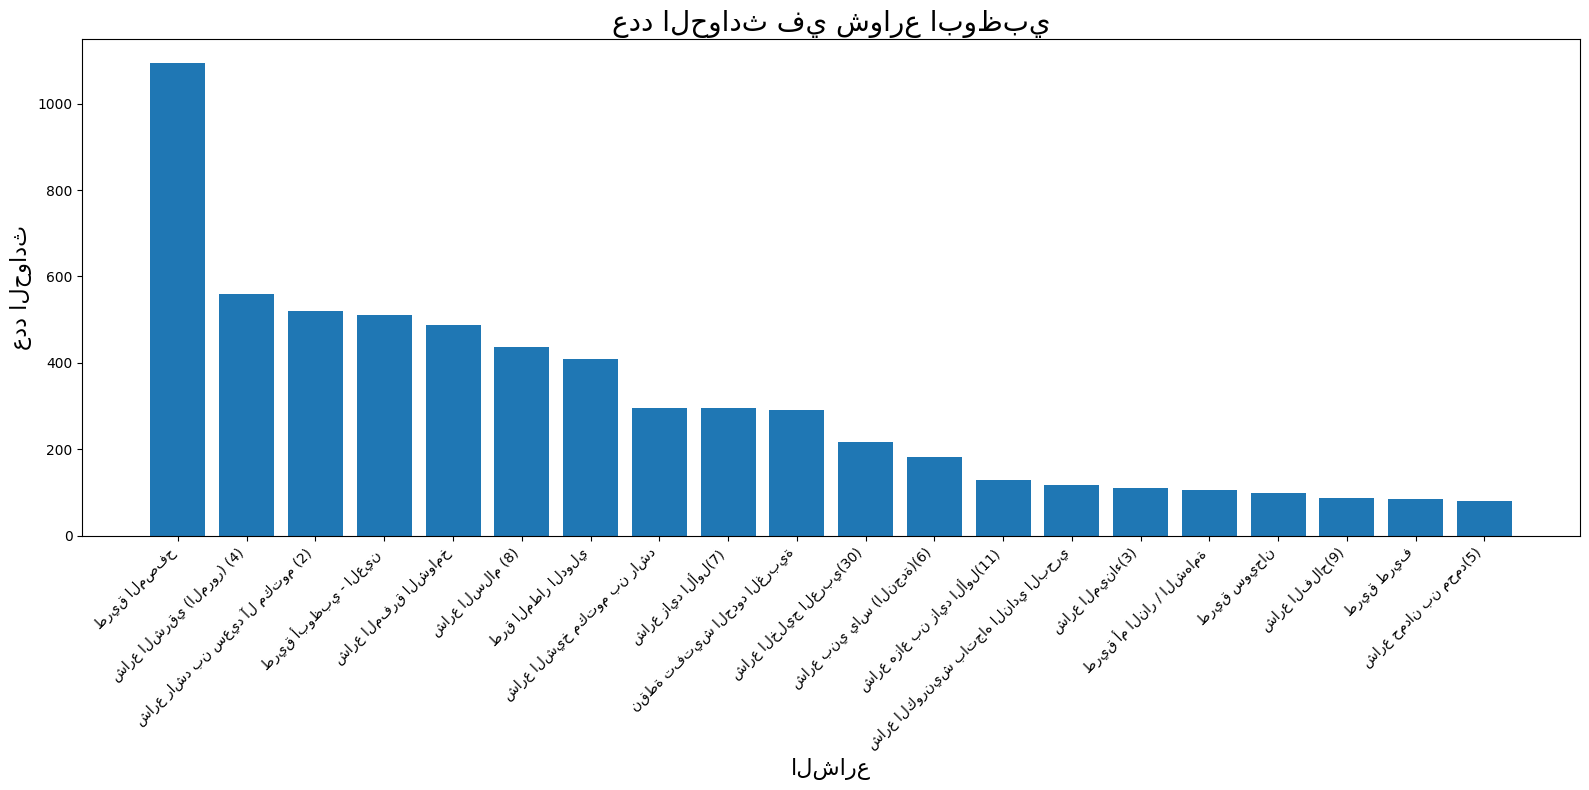

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with 'City' and 'Street' columns
# If not, you'll need to load your data first

# Specify the city you want to visualize
city_name = 'ابوظبي'

# Filter the DataFrame for the specified city and count street frequencies
city_data = df[df['City'] == city_name]
street_count = city_data['Street'].value_counts()

# Limit to top 20 streets for better visibility
street_count = street_count.nlargest(20)

# Create the bar plot
plt.figure(figsize=(16, 8))
plt.bar(street_count.index, street_count.values)

# Customize the plot
plt.title(f"عدد الحوادث في شوارع {city_name}", fontsize=20)
plt.xlabel("الشارع", fontsize=16)
plt.ylabel("عدد الحوادث", fontsize=16)

# Set the font to a Unicode-compatible font that supports Arabic
plt.rcParams['font.family'] = 'Arial'

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout and display
plt.tight_layout()
plt.show()

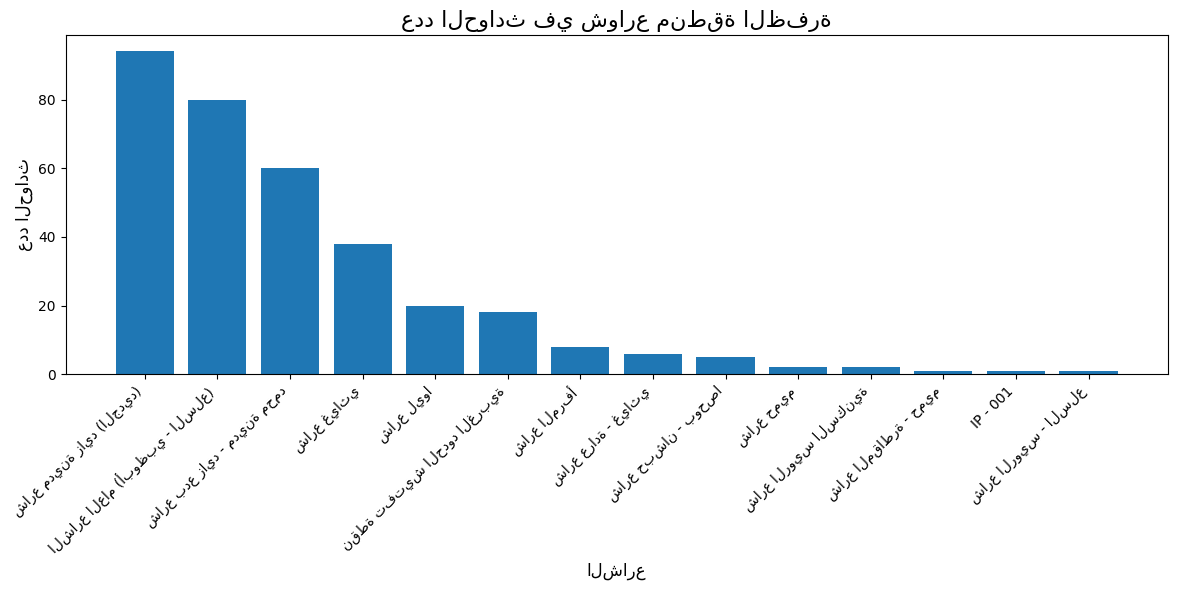

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with 'City' and 'Street' columns
# If not, you'll need to load your data first

# Specify the city you want to visualize
city_name = 'منطقة الظفرة'

# Filter the DataFrame for the specified city and count street frequencies
city_data = df[df['City'] == city_name]
street_count = city_data['Street'].value_counts()

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(street_count.index, street_count.values)

# Customize the plot
plt.title(f"عدد الحوادث في شوارع {city_name}", fontsize=16)
plt.xlabel("الشارع", fontsize=12)
plt.ylabel("عدد الحوادث", fontsize=12)

# Set the font to a Unicode-compatible font that supports Arabic
plt.rcParams['font.family'] = 'DejaVu Sans'

# Rotate x-axis labels for better readability if there are many streets
plt.xticks(rotation=45, ha='right')

# Adjust layout and display
plt.tight_layout()
plt.show()

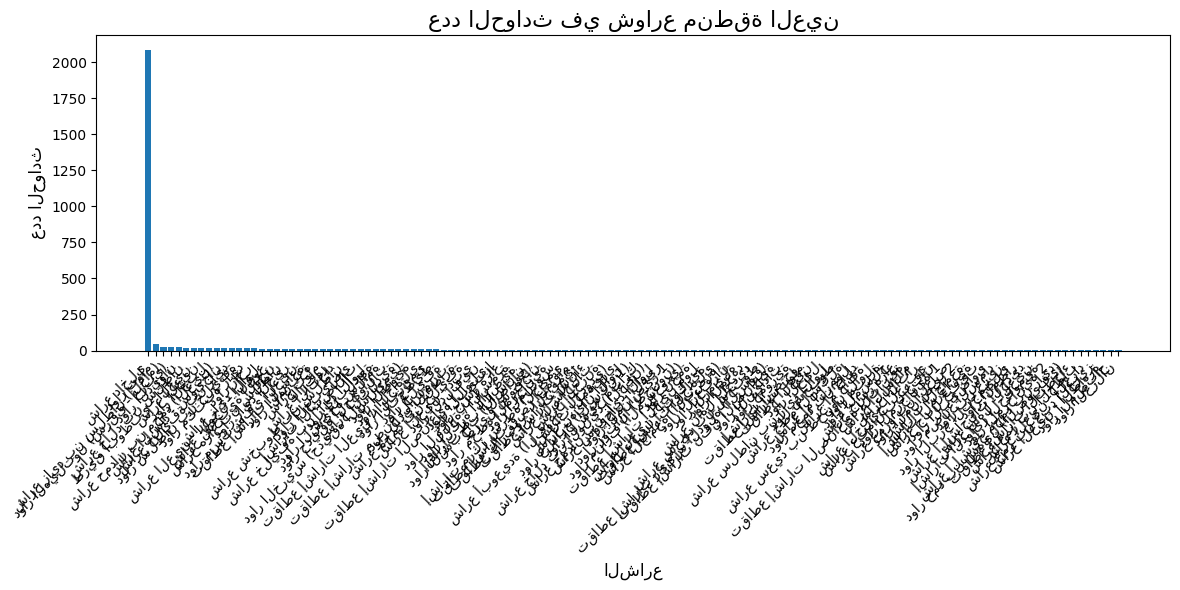

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with 'City' and 'Street' columns
# If not, you'll need to load your data first

# Specify the city you want to visualize
city_name = 'منطقة العين'

# Filter the DataFrame for the specified city and count street frequencies
city_data = df[df['City'] == city_name]
street_count = city_data['Street'].value_counts()

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(street_count.index, street_count.values)

# Customize the plot
plt.title(f"عدد الحوادث في شوارع {city_name}", fontsize=16)
plt.xlabel("الشارع", fontsize=12)
plt.ylabel("عدد الحوادث", fontsize=12)

# Set the font to a Unicode-compatible font that supports Arabic
plt.rcParams['font.family'] = 'DejaVu Sans'

# Rotate x-axis labels for better readability if there are many streets
plt.xticks(rotation=45, ha='right')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

def print_top_street_percentages(df, top_n=5):
    # Get unique cities
    cities = df['City'].unique()

    # Loop through each city
    for city in cities:
        # Filter the DataFrame for the specified city
        city_data = df[df['City'] == city]

        # Count the frequency of accidents for each street
        street_counts = city_data['Street'].value_counts()

        # Calculate the percentage of total accidents for each street
        street_percentages = (street_counts / street_counts.sum()) * 100

        # Get the top N streets by percentage
        top_street_percentages = street_percentages.nlargest(top_n)

        # Print the results for the current city
        print(f"Top {top_n} Streets with the Highest Percentage of Accidents in {city}:")
        for street, percentage in top_street_percentages.items():
            print(f"{street}: {percentage:.2f}%")
        print("=" * 60)

# Assuming you have a DataFrame 'df' with 'City' and 'Street' columns
# You can call the function with your DataFrame like this:
print_top_street_percentages(df)


Top 5 Streets with the Highest Percentage of Accidents in ابوظبي:
طريق المصفح: 16.25%
شارع الشرقي (المرور) (4): 8.30%
شارع راشد بن سعيد آل مكتوم (2): 7.71%
طريق أبوظبي - العين: 7.59%
شارع المفرق الشوامخ: 7.23%
Top 5 Streets with the Highest Percentage of Accidents in منطقة الظفرة:
شارع مدينة زايد (الجديد): 27.98%
الشارع العام (أبوظبي - السلع): 23.81%
شارع بدع زايد - مدينة محمد: 17.86%
شارع غياثي: 11.31%
شارع ليوا: 5.95%
Top 5 Streets with the Highest Percentage of Accidents in منطقة العين:
شارع داخلي: 71.18%
دوار توام: 1.61%
شارع زايد بن سلطان (العام): 0.92%
دوار الهيلتون (شرقي - غربي): 0.79%
دوار الديوان: 0.75%


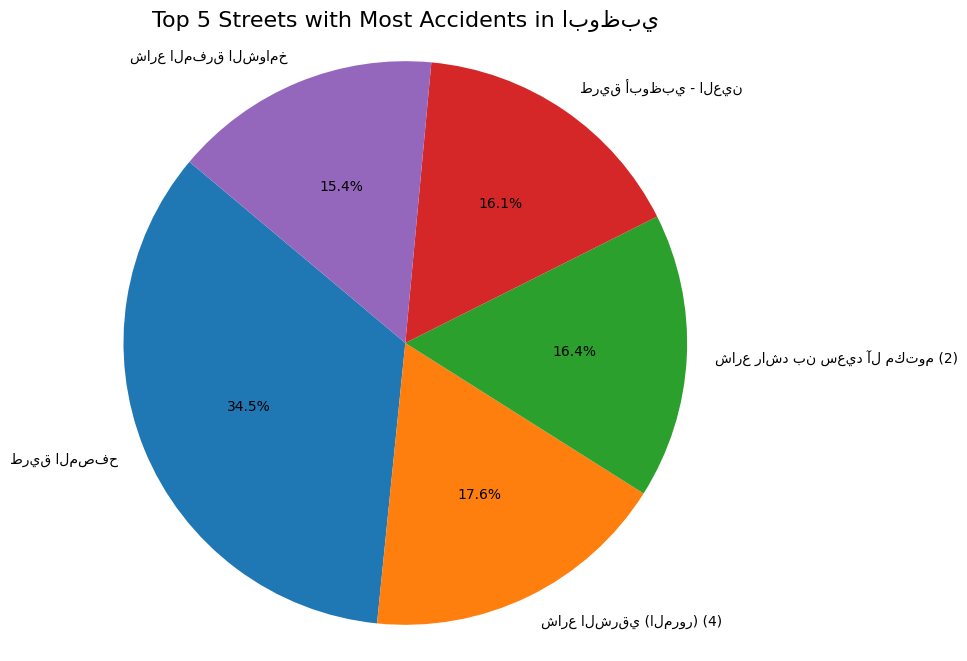

Plotted top 5 streets for ابوظبي


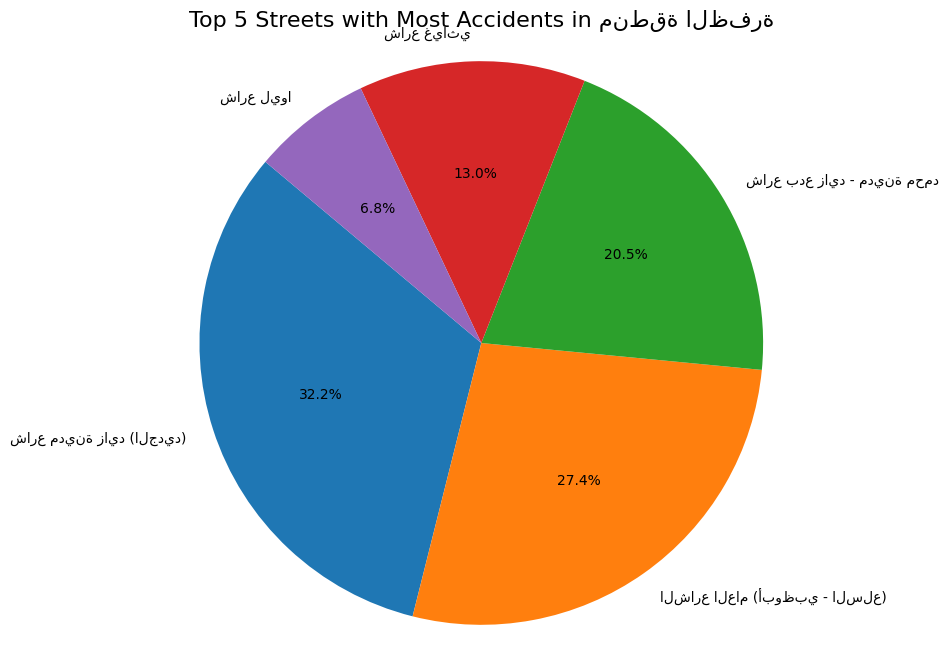

Plotted top 5 streets for منطقة الظفرة


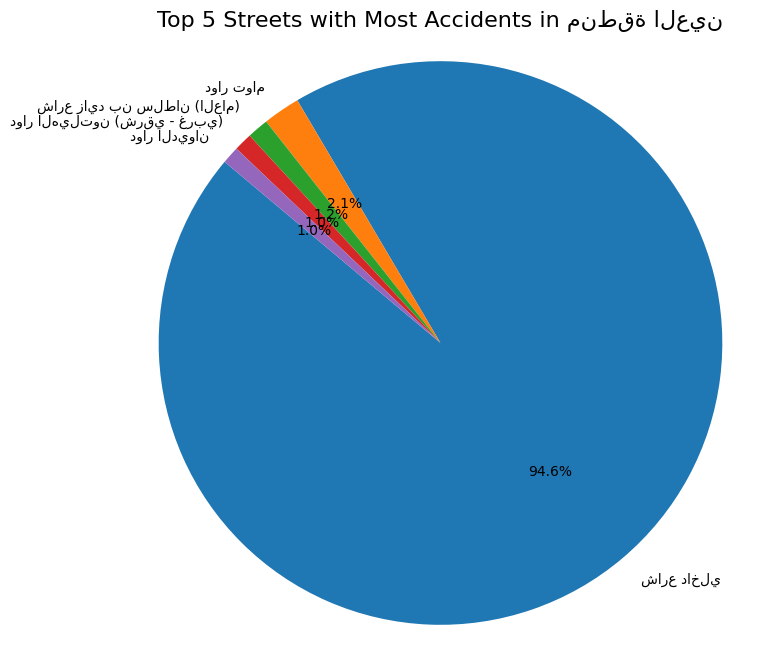

Plotted top 5 streets for منطقة العين


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_street_frequencies(df, city_name, top_n=10):
    # Filter the DataFrame for the specified city
    city_data = df[df['City'] == city_name]

    # Count the frequency of accidents for each street
    street_counts = city_data['Street'].value_counts().nlargest(top_n)

    # Create the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(street_counts.values, labels=street_counts.index, autopct='%1.1f%%', startangle=140)

    # Customize the plot
    plt.title(f"Top {top_n} Streets with Most Accidents in {city_name}", fontsize=16)

    # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.axis('equal')

    # Show the plot
    plt.show()

# Assuming you have a DataFrame 'df' with 'City' and 'Street' columns
# If not, you'll need to load your data first

# Get unique cities and sort them
cities = sorted(df['City'].unique())

# Loop through all cities
for city in cities:
    plot_street_frequencies(df, city, top_n=5)
    print(f"Plotted top 5 streets for {city}")
    print("=" * 60)


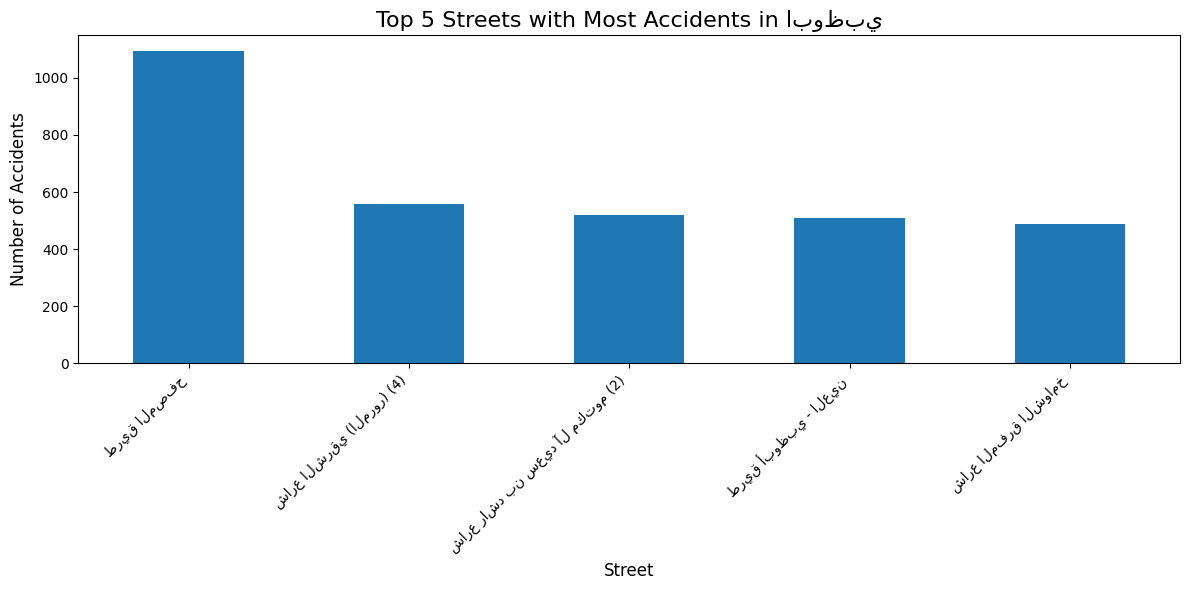

Plotted top 10 streets for ابوظبي


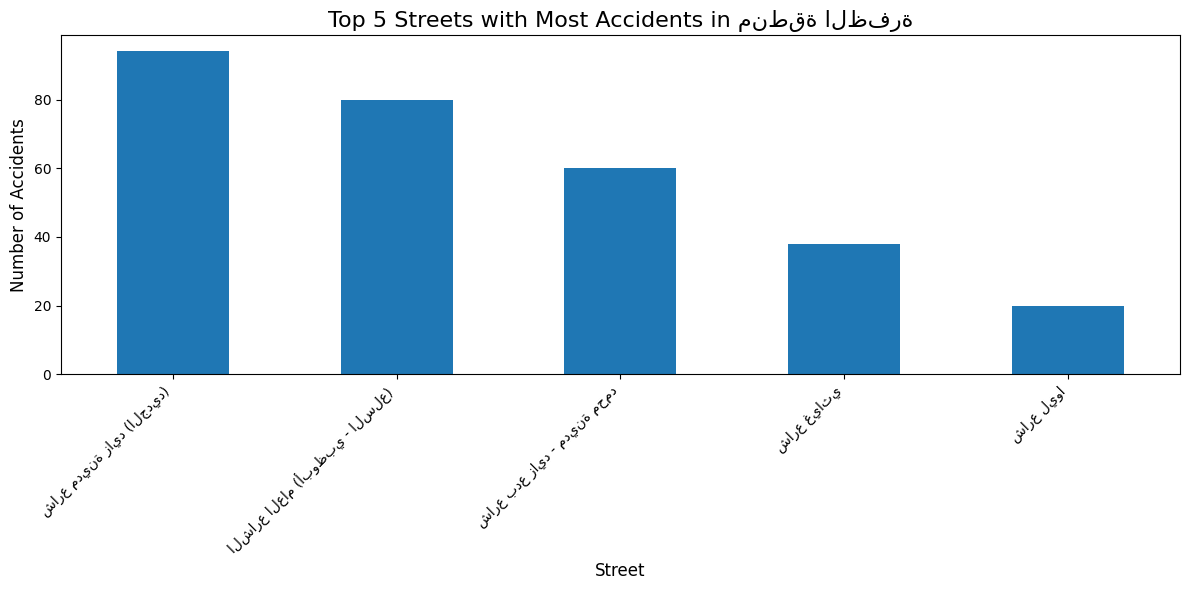

Plotted top 10 streets for منطقة الظفرة


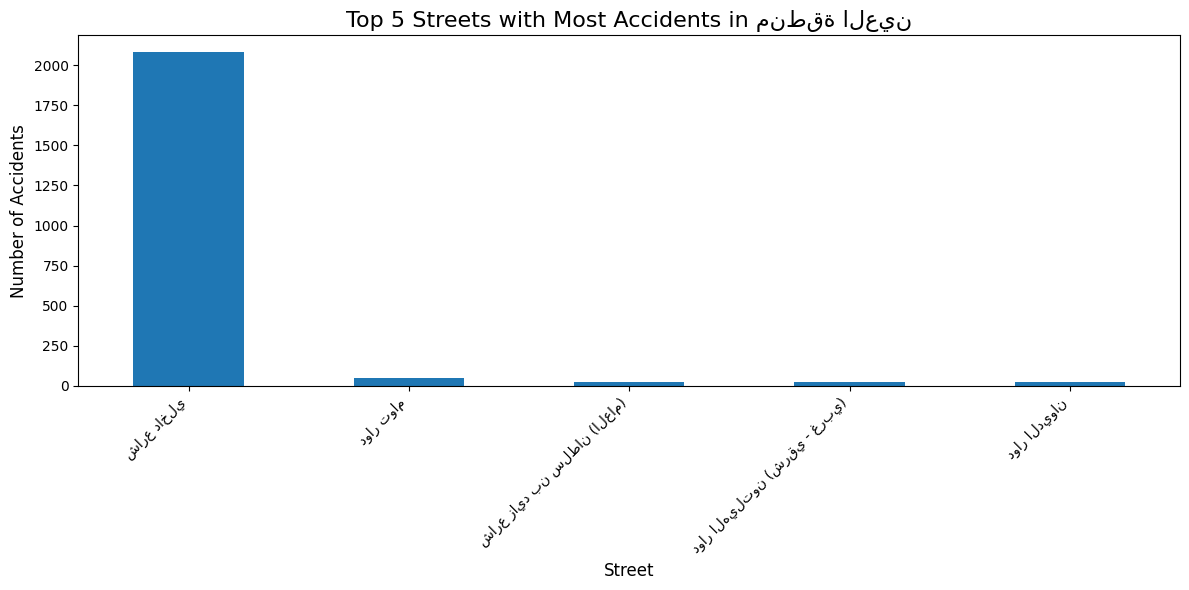

Plotted top 10 streets for منطقة العين


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_street_frequencies(df, city_name, top_n=10):
    # Filter the DataFrame for the specified city
    city_data = df[df['City'] == city_name]

    # Count the frequency of accidents for each street
    street_counts = city_data['Street'].value_counts().nlargest(top_n)

    # Create the bar plot
    plt.figure(figsize=(12, 6))
    street_counts.plot(kind='bar')

    # Customize the plot
    plt.title(f"Top {top_n} Streets with Most Accidents in {city_name}", fontsize=16)
    plt.xlabel("Street", fontsize=12)
    plt.ylabel("Number of Accidents", fontsize=12)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

# Assuming you have a DataFrame 'df' with 'City' and 'Street' columns
# If not, you'll need to load your data first

# Get unique cities and sort them
cities = sorted(df['City'].unique())

# Loop through all cities
for city in cities:
    plot_street_frequencies(df, city, top_n=5)
    print(f"Plotted top 10 streets for {city}")
    print("=" * 60)

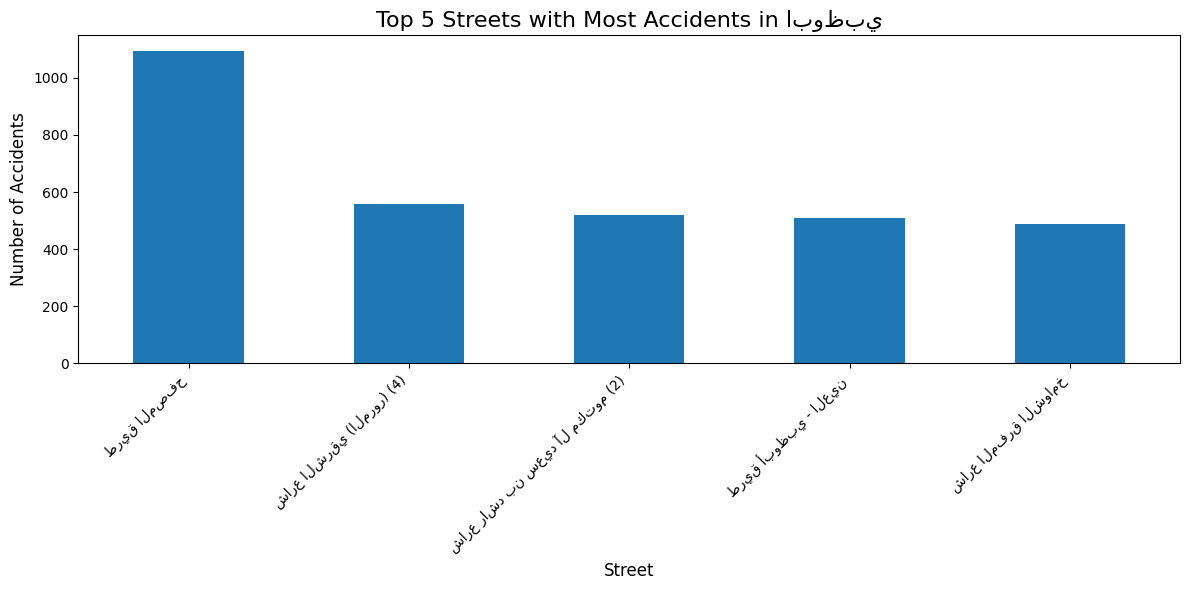

Plotted top 10 streets for ابوظبي


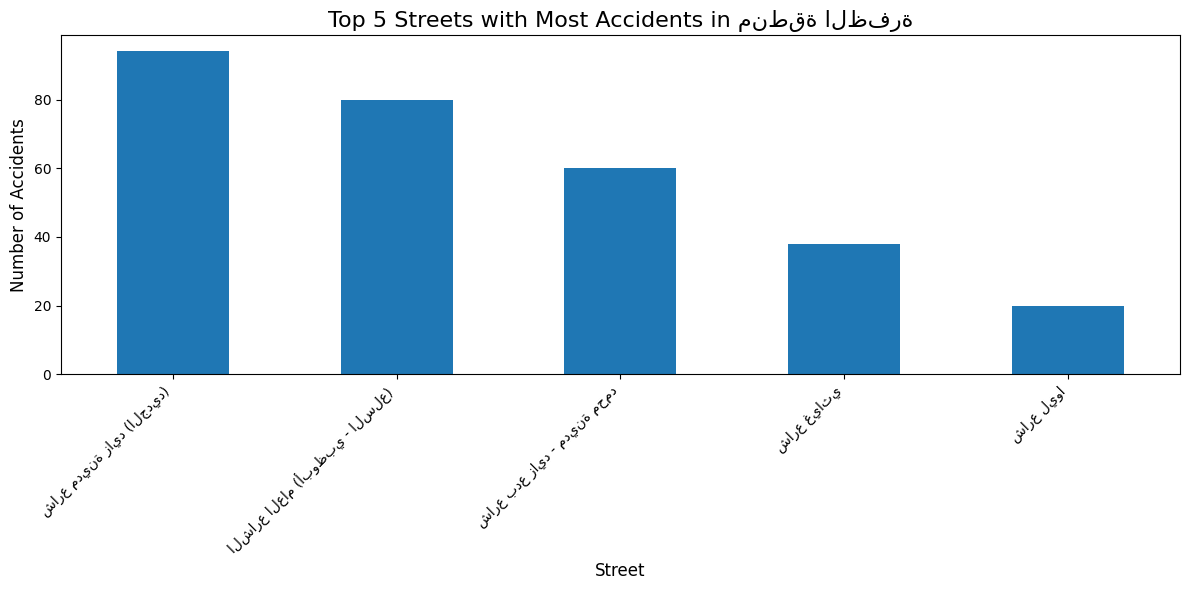

Plotted top 10 streets for منطقة الظفرة


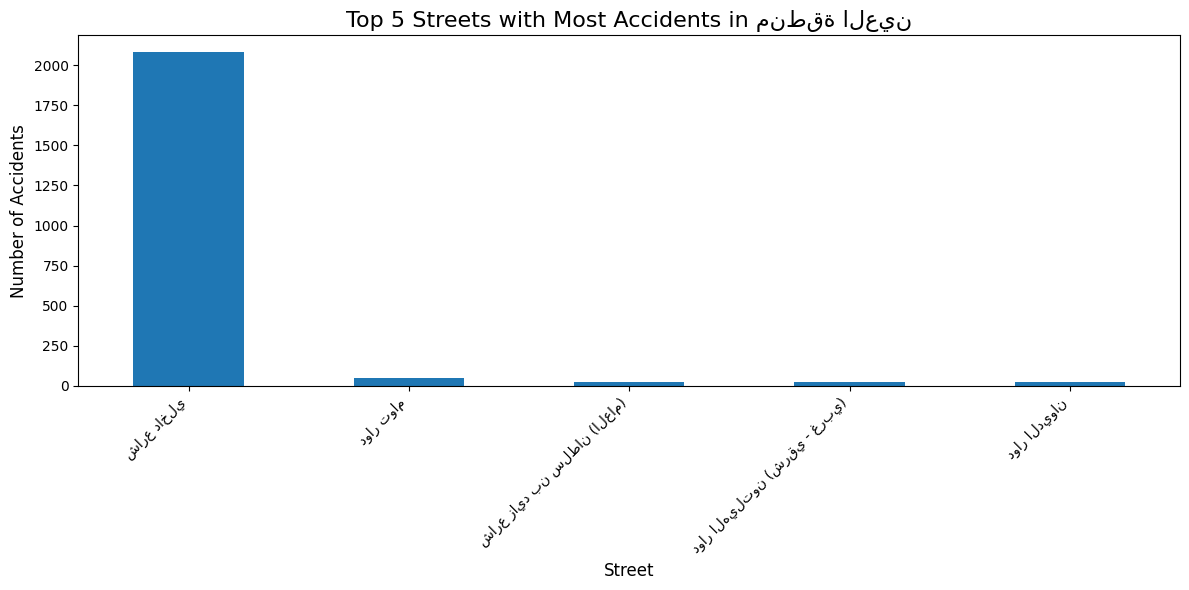

Plotted top 10 streets for منطقة العين


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_street_frequencies(df, city_name, top_n=10):
    # Filter the DataFrame for the specified city
    city_data = df[df['City'] == city_name]

    # Count the frequency of accidents for each street
    street_counts = city_data['Street'].value_counts().nlargest(top_n)

    # Create the bar plot
    plt.figure(figsize=(12, 6))
    street_counts.plot(kind='bar')

    # Customize the plot
    plt.title(f"Top {top_n} Streets with Most Accidents in {city_name}", fontsize=16)
    plt.xlabel("Street", fontsize=12)
    plt.ylabel("Number of Accidents", fontsize=12)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

# Assuming you have a DataFrame 'df' with 'City' and 'Street' columns
# If not, you'll need to load your data first

# Get unique cities and sort them
cities = sorted(df['City'].unique())

# Loop through all cities
for city in cities:
    plot_street_frequencies(df, city, top_n=5)
    print(f"Plotted top 10 streets for {city}")
    print("=" * 60)


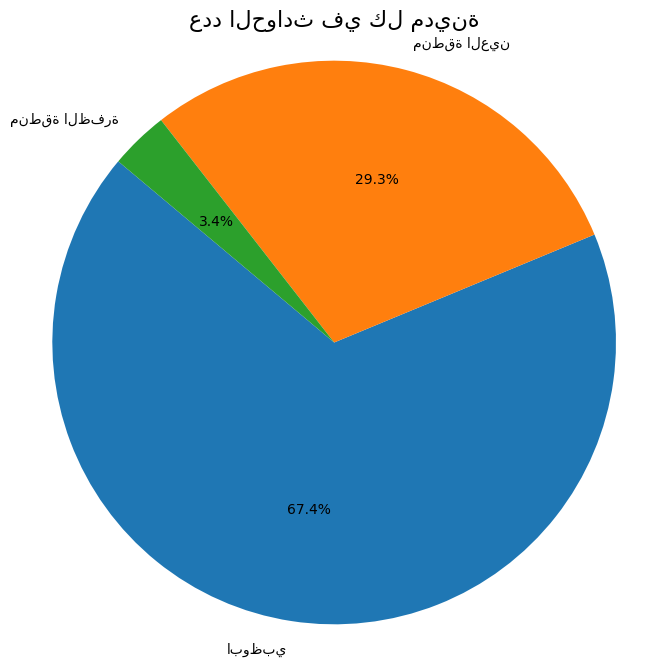

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with a 'City' column
# If not, you'll need to load your data first

# Count the frequency of accidents for each city
city_counts = df['City'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(city_counts.values, labels=city_counts.index, autopct='%1.1f%%', startangle=140)

# Customize the plot
plt.title("عدد الحوادث في كل مدينة", fontsize=16)

# Set the font to a Unicode-compatible font that supports Arabic
plt.rcParams['font.family'] = 'DejaVu Sans'

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the plot
plt.show()


In [ ]:
import pandas as pd

def print_top_streets(df, top_n=5):
    # Get unique cities
    cities = df['City'].unique()

    # Loop through each city
    for city in cities:
        # Filter the DataFrame for the specified city
        city_data = df[df['City'] == city]

        # Count the frequency of accidents for each street and get the top N
        top_streets = city_data['Street'].value_counts().nlargest(top_n)

        # Print the results for the current city
        print(f"Top {top_n} Streets with Most Accidents in {city}:")
        print(top_streets)
        print("=" * 60)

# Assuming you have a DataFrame 'df' with 'City' and 'Street' columns
# You can call the function with your DataFrame like this:
print_top_streets(df)


Top 5 Streets with Most Accidents in ابوظبي:
Street
طريق المصفح                       1094
شارع الشرقي (المرور) (4)           559
شارع راشد بن سعيد آل مكتوم (2)     519
طريق أبوظبي - العين                511
شارع المفرق الشوامخ                487
Name: count, dtype: int64
Top 5 Streets with Most Accidents in منطقة الظفرة:
Street
شارع مدينة زايد (الجديد)         94
الشارع العام (أبوظبي - السلع)    80
شارع بدع زايد - مدينة محمد       60
شارع غياثي                       38
شارع ليوا                        20
Name: count, dtype: int64
Top 5 Streets with Most Accidents in منطقة العين:
Street
شارع داخلي                     2082
دوار توام                        47
شارع زايد بن سلطان (العام)       27
دوار الهيلتون (شرقي - غربي)      23
دوار الديوان                     22
Name: count, dtype: int64


In [ ]:
df = df.drop('Rep Date', axis = 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
  if df[col].dtype == object:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

<Axes: >

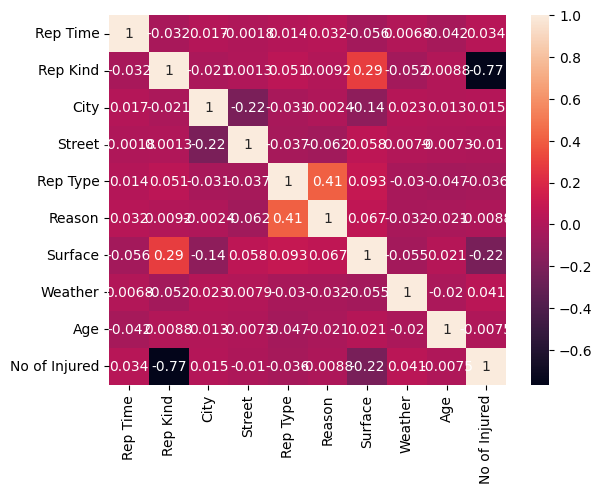

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.drop('City', axis=1)
y = df['City']

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=3)  # Assuming 3 classes


In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(units=6, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=6, activation='relu'))

In [ ]:
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=6, activation='relu'))

In [ ]:
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=6, activation='relu'))

In [ ]:
model.add(Dense(units=3, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 501 (1.96 KB)

 Trainable params: 501 (1.96 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, batch_size=10, epochs=100, validation_split=0.2)

Epoch 1/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6555 - loss: 0.8609 - val_accuracy: 0.6769 - val_loss: 0.6855
Epoch 2/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6706 - loss: 0.6990 - val_accuracy: 0.7025 - val_loss: 0.6693
Epoch 3/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7183 - loss: 0.6515 - val_accuracy: 0.8288 - val_loss: 0.4378
Epoch 4/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8365 - loss: 0.4417 - val_accuracy: 0.8500 - val_loss: 0.3883
Epoch 5/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8482 - loss: 0.3944 - val_accuracy: 0.8944 - val_loss: 0.3455
Epoch 6/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8729 - loss: 0.3464 - val_accuracy: 0.8863 - val_loss: 0.3036
Epoch 7/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8988 - loss: 0.3043 - val_accuracy: 0.9212 - val_loss: 0.2617
Epoch 8/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8975 - loss: 0.3067 - val_accu

In [ ]:
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_test, num_classes=3)  # Assuming 3 classes


In [ ]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9466 - loss: 0.1860


[0.18967120349407196, 0.940500020980835]